# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('dados_tratados.csv')
df['mau'] = df['mau'].astype(int)

In [3]:
y = df['mau']
X = df.drop('mau', axis=1)

In [4]:
print(f'y shape: {y.shape}')
print(f'X shape: {X.shape}')

y shape: (16650,)
X shape: (16650, 32)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
clf = DecisionTreeClassifier(random_state=100)

In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

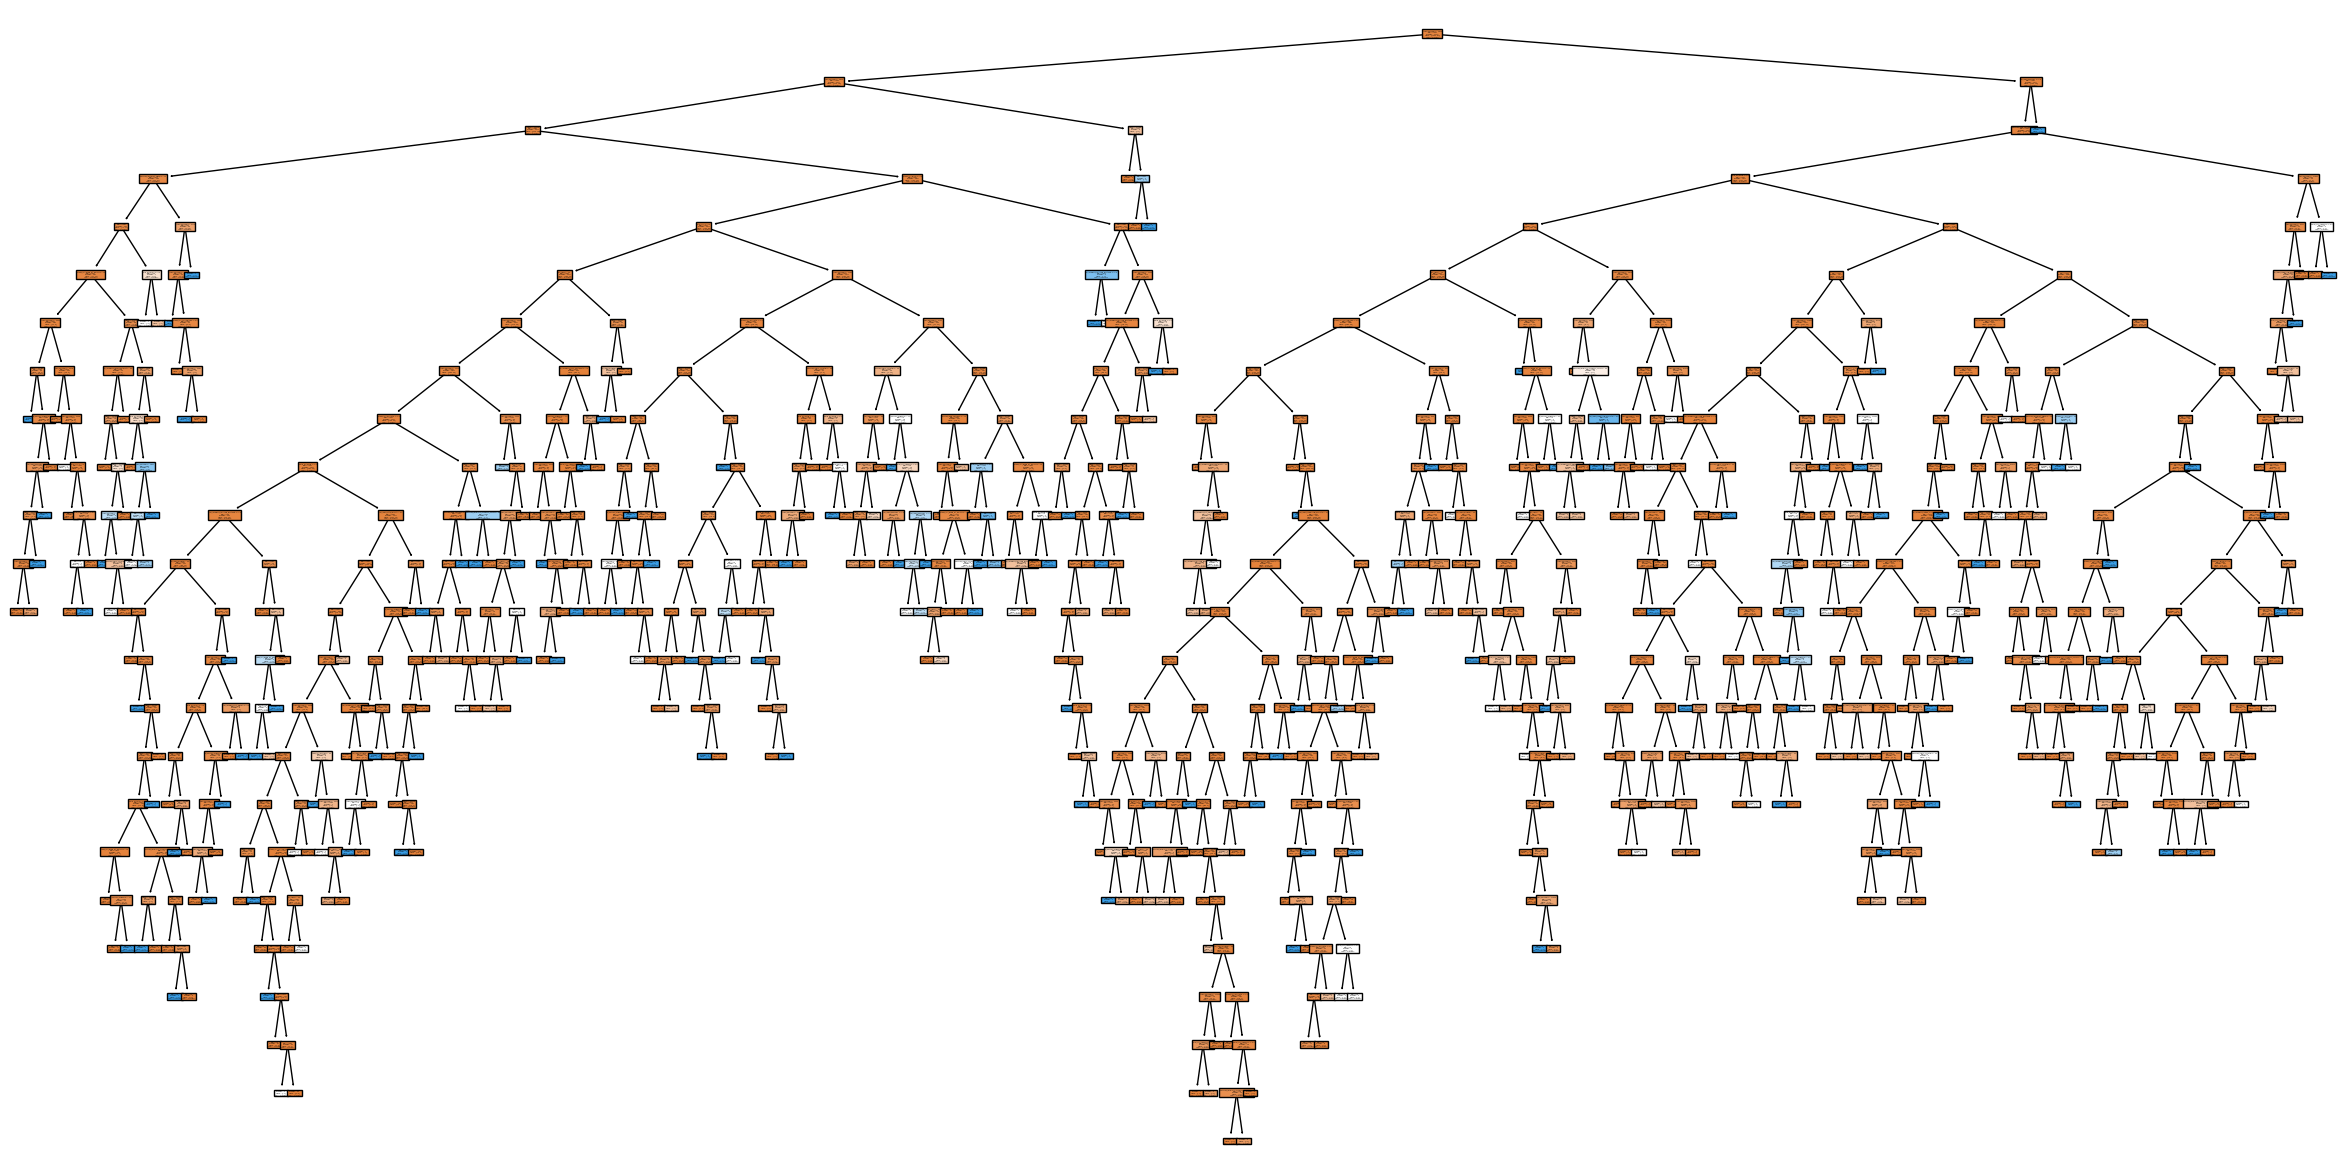

In [8]:
labels = ['Aprovados', 'Reprovados']

plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, class_names=labels, feature_names=X.columns);

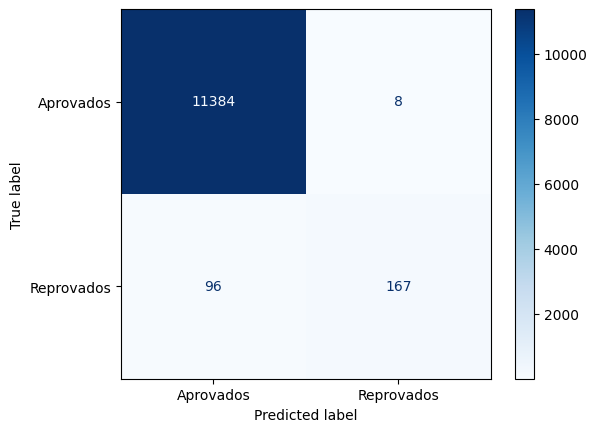

In [9]:
def confusion_matrix_display_plot(classifier, predictions, y_test, labels) -> None:
    cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)

predictions = clf.predict(X_train)
    
confusion_matrix_display_plot(clf, predictions, y_train, labels)

In [10]:
accuracy_score(y_train, predictions)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [11]:
predictions = clf.predict(X_test)

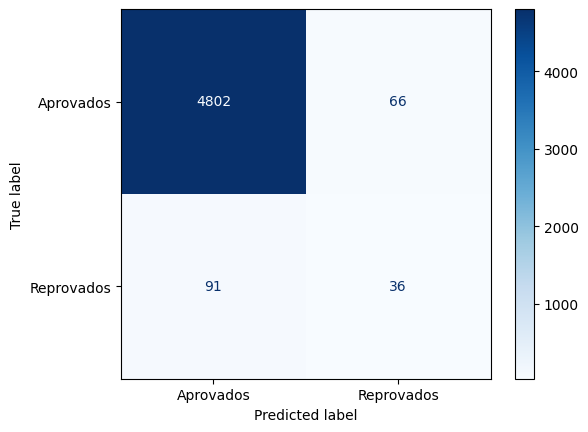

In [12]:
confusion_matrix_display_plot(clf, predictions, y_test, labels)

In [13]:
accuracy_score(y_test, predictions)

0.9685685685685685

In [14]:
clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

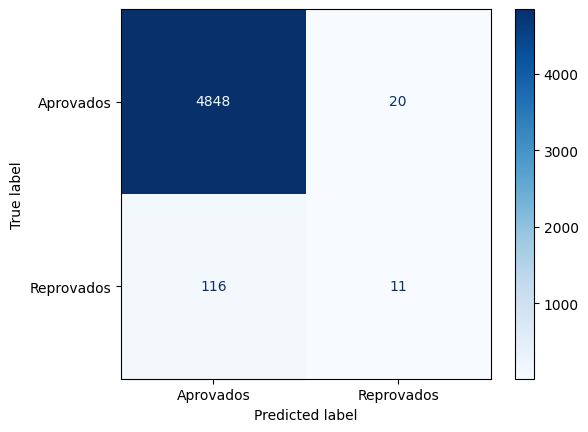

In [15]:
confusion_matrix_display_plot(clf, predictions, y_test, labels)

In [16]:
# 0.62% foram classificados como 'maus'
# O algoritmo acertou 11 reprovados e considerou 20 "Aprovados" como "Reprovados"
# Considerando esses 2 valores, temos 31, 0,62%

reprovados = ((20 + 11) / y_test.shape[0]) * 100
reprovados

0.6206206206206206

In [17]:
y_train_bons = np.copy(y_train)
y_test_bons = np.copy(y_test)

y_train_bons[:] = 1
y_test_bons[:] = 1

clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf.fit(X_train, y_train_bons)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test_bons, predictions)

print(f"Como ficaria a acurácia se você classificasse todos os contratos como 'bons'? Resposta: {accuracy}")

Como ficaria a acurácia se você classificasse todos os contratos como 'bons'? Resposta: 1.0
